In [50]:
import pandas as pd

In [51]:
from datetime import datetime, date

In [52]:
import matplotlib.pyplot as plt 

In [53]:
import seaborn as sns

In [54]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

As a reminder, there is missing data starting 2016-12-31, ending 2017-07-05.

In [3]:
df_his_index

,Date,tech_weight,Open,High,Low,Close,Open_wi,High_wi,Low_wi,Close_wi
0,2014-01-02,18.666742,1845.86,1845.86,1827.74,1831.98,344.561924,344.561924,341.179510,341.970980
1,2014-01-03,18.575319,1833.21,1838.24,1829.13,1831.37,340.524605,341.458944,339.766732,340.182820
2,2014-01-06,18.617887,1832.31,1837.16,1823.73,1826.77,341.137405,342.040373,339.539991,340.105974
3,2014-01-07,18.672965,1828.71,1840.10,1828.71,1837.88,341.474378,343.601229,341.474378,343.186689
4,2014-01-08,18.639790,1837.90,1840.02,1831.40,1837.49,342.580700,342.975864,341.369114,342.504277
...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,37.089590,5817.80,5817.80,5784.92,5809.86,2157.798167,2157.798167,2145.603110,2154.853254
2564,2024-10-25,37.319370,5826.75,5862.82,5799.98,5808.12,2174.506391,2187.967488,2164.515996,2167.553793
2565,2024-10-28,37.250240,5833.93,5842.92,5823.08,5823.52,2173.152926,2176.501723,2169.111275,2169.275176
2566,2024-10-29,37.562030,5819.68,5847.19,5802.17,5832.92,2185.989948,2196.323262,2179.412836,2190.963160


In [72]:
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

In [25]:
lst_time_delta=[0]
for index in range(1,2568): 
    lst_time_delta.append((df_his_index.loc[index]["Date"]-df_his_index.loc[index-1]["Date"]).days)


In [27]:
df_his_index["Timedelta_days"]=lst_time_delta

There is no value prior to 2014-01-02, we will just approximate the proportional change by close_wi against open_wi. 

In [37]:
lst_pro_change=[(df_his_index.loc[0]["Close_wi"]-df_his_index.loc[0]["Open_wi"])*100/df_his_index.loc[0]["Open_wi"]]

In [38]:
for index in range(1,2568): 
    lst_pro_change.append((df_his_index.loc[index]["Close_wi"]-df_his_index.loc[index-1]["Close_wi"])*100/df_his_index.loc[index-1]["Close_wi"])

In [40]:
df_his_index["pro_change_close_wi"]=lst_pro_change

In [41]:
df_his_index

,Date,tech_weight,Open,High,Low,Close,Open_wi,High_wi,Low_wi,Close_wi,Timedelta_days,pro_change_close_wi
0,2014-01-02,18.666742,1845.86,1845.86,1827.74,1831.98,344.561924,344.561924,341.179510,341.970980,0,-0.751953
1,2014-01-03,18.575319,1833.21,1838.24,1829.13,1831.37,340.524605,341.458944,339.766732,340.182820,1,-0.522898
2,2014-01-06,18.617887,1832.31,1837.16,1823.73,1826.77,341.137405,342.040373,339.539991,340.105974,3,-0.022589
3,2014-01-07,18.672965,1828.71,1840.10,1828.71,1837.88,341.474378,343.601229,341.474378,343.186689,1,0.905810
4,2014-01-08,18.639790,1837.90,1840.02,1831.40,1837.49,342.580700,342.975864,341.369114,342.504277,1,-0.198846
...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,37.089590,5817.80,5817.80,5784.92,5809.86,2157.798167,2157.798167,2145.603110,2154.853254,1,0.014143
2564,2024-10-25,37.319370,5826.75,5862.82,5799.98,5808.12,2174.506391,2187.967488,2164.515996,2167.553793,1,0.589392
2565,2024-10-28,37.250240,5833.93,5842.92,5823.08,5823.52,2173.152926,2176.501723,2169.111275,2169.275176,3,0.079416
2566,2024-10-29,37.562030,5819.68,5847.19,5802.17,5832.92,2185.989948,2196.323262,2179.412836,2190.963160,1,0.999780


As a reminder, yet again, there is missing data starting 2016-12-31, ending 2017-07-05.

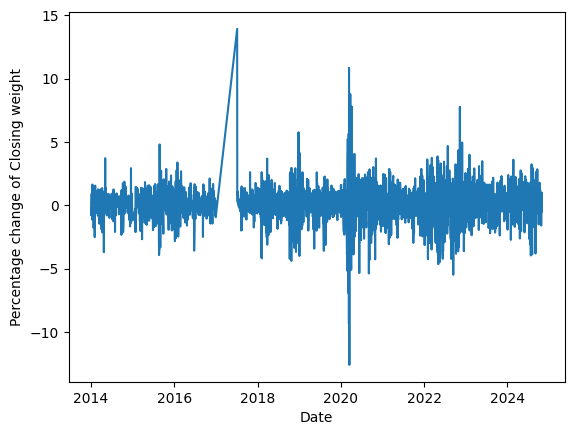

In [46]:
sns.lineplot(data=df_his_index, x="Date", y="pro_change_close_wi")
plt.ylabel("Percentage change of Closing weight")
plt.show()

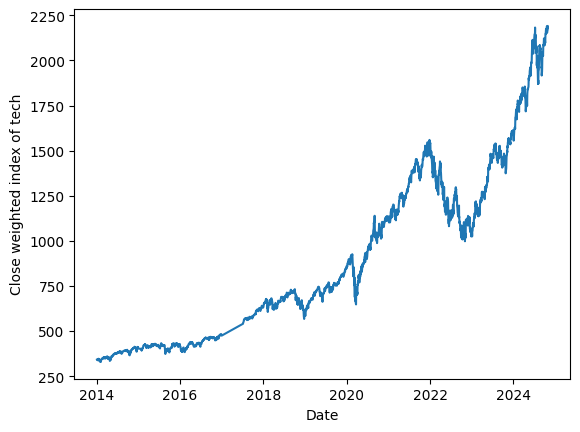

In [47]:
sns.lineplot(data=df_his_index, x="Date", y="Close_wi")
plt.ylabel("Close weighted index of tech")
plt.show()

Notice that the following line is read after a pd.to_csv and od.read_csv, so the "Date" is a string. 

In [57]:
df_his_index[df_his_index["Date"]=="2017-07-06"]

,Date,tech_weight,Open,High,Low,Close,Open_wi,High_wi,Low_wi,Close_wi,Timedelta_days,pro_change_close_wi
737,2017-07-06,22.44026,2423.44,2424.28,2407.7,2409.75,543.826237,544.014735,540.29414,540.754165,188,13.923144


Since there is no value on 2017-07-05, we will just approximate the proportional change by close_wi against open_wi. 

In [67]:
df_his_index.at[737,"pro_change_close_wi"]=(df_his_index.loc[737]["Close_wi"]-df_his_index.loc[737]["Open_wi"])*100/df_his_index.loc[737]["Open_wi"]

In [69]:
df_his_index.loc[737]["pro_change_close_wi"]

-0.5648994817284562

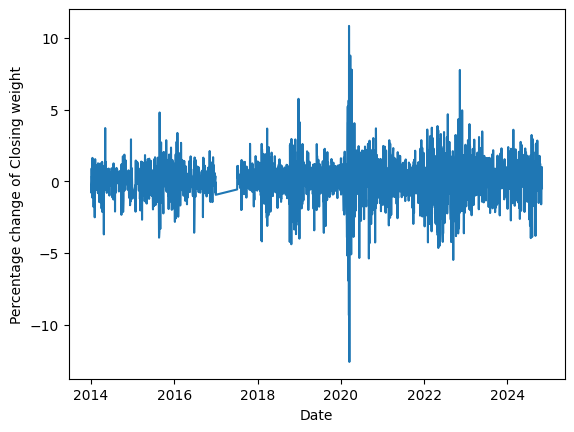

In [73]:
sns.lineplot(data=df_his_index, x="Date", y="pro_change_close_wi")
plt.ylabel("Percentage change of Closing weight")
plt.show()

In [70]:
df_his_index.to_csv("../../processed/his_index_tech_500_stable_14_24.csv", index=False)